# Exercise 4   Egor Gordeev

Simulate an AR(2) process and play around with different combination of parameters.  Calculate the eigenvalues $\lambda$, validate that process is stationary and assess the kind of AR(2) process (with and without oscillation).  

Tipps:  
1) For calculations with complex numbers you can use the library cmath:  
https://docs.python.org/3/library/cmath.html  
2) Write functions to calculate the AR(2), the Eigenvalues, the proof of stationarity and the period for easy access.

In [1]:
import sys
import os
import matplotlib.pyplot as plt
import numpy as np
from scipy.linalg import det, inv, eig
import statsmodels.api as sm
import statsmodels.tsa.arima_process as ap
import cmath

In [2]:
from jupyterthemes import jtplot
# currently installed theme will be used to
# set plot style if no arguments provided
jtplot.style()
jtplot.style(theme='chesterish')

In [4]:
def get_AR2(WN_arr,alpha1,alpha2):
    # Two initial values of the AR(2) process
    x0=WN_arr[0]   
    x1=alpha1*WN_arr[0]+WN_arr[1]   # AR1 process
    # generate emlpty array to be filled with AR2 values
    x_arr  = np.zeros(nt)
    # assign two initial values 
    x_arr[0] = x0
    x_arr[1] = x1
    # from 3rd to the last element    
    for i in range(2,nt):
        x_arr[i] = alpha1*x_arr[i-1]+alpha2*x_arr[i-2]+WN_arr[i]
        
    return x_arr

In [ ]:
# CALCULATE EIGENVALUES IF A MATRIX

In [6]:
def get_eig(alpha1,alpha2):
#     amatr=np.array([[alpha1,alpha2],[1,0]])
#     eigvals,eigvects=eig(amatr)
    lambda1=alpha1/2+cmath.sqrt((alpha1**2)/4+alpha2)
    lambda2=alpha1/2-cmath.sqrt((alpha1**2)/4+alpha2)
    eigvals=np.array([lambda1,lambda2])
    
    return eigvals

In [7]:
def stationary(alpha1,alpha2):
   
    eigvals=get_eig(alpha1,alpha2)
    if False in [abs(i)<1 for i in eigvals]:
        return False
    else:
        return True
    

In [8]:
def get_period(alpha1,alpha2):
    lambda1,lambda2=get_eig(alpha1,alpha2)
    T1=np.arctan(np.imag(lambda1)/np.real(lambda1))/(2*np.pi)
    
    
    return 1/T1
    

lambda1=(0.9099019513592785+0j),lambda2=(-0.1099019513592785+0j)
AR2 process is stationary:True
T1 period =inf


/home/igor/anaconda3/envs/MSC_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  


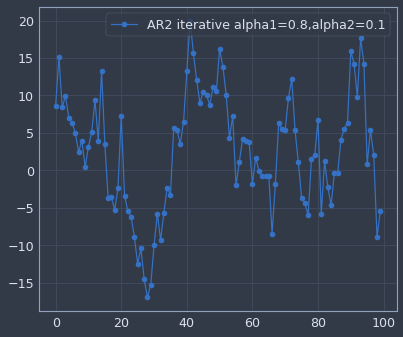

In [30]:
# WHITE NOISE PARAMS
mu=0
sigma=5
nt=100 #  n of samples
# GENERATE WHITE NOISE
WN_arr = np.random.normal(loc=mu,scale=sigma,size=nt)
# Two alpha parameters
alpha1=0.8
alpha2=0.1
# generate AR2 process
xarr=get_AR2(WN_arr,alpha1,alpha2)
plt.plot(xarr,'-o',label=f'AR2 iterative alpha1={alpha1},alpha2={alpha2}')
plt.legend();
# get eigenvalues
lambda1,lambda2=get_eig(alpha1,alpha2)
print(f'lambda1={lambda1},lambda2={lambda2}')
print(f'AR2 process is stationary:{stationary(alpha1,alpha2)}')
T1=get_period(alpha1,alpha2)
print(f'T1 period ={T1}')

lambda1=(0.5+0.5j),lambda2=(0.5-0.5j)
AR2 process is stationary:True
T1 period =8.0


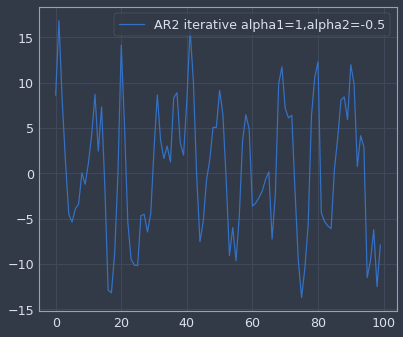

In [98]:
# Two alpha parameters
alpha1=1
alpha2=-0.5
# generate AR2 process
xarr=get_AR2(WN_arr,alpha1,alpha2)
plt.plot(xarr,label=f'AR2 iterative alpha1={alpha1},alpha2={alpha2}')
plt.legend();
# get eigenvalues
lambda1,lambda2=get_eig(alpha1,alpha2)
print(f'lambda1={lambda1},lambda2={lambda2}')
print(f'AR2 process is stationary:{stationary(alpha1,alpha2)}')
T1=get_period(alpha1,alpha2)
print(f'T1 period ={T1}')

lambda1=(1.0916079783099617+0j),lambda2=(-0.09160797830996159+0j)
AR2 process is stationary:False
T1 period =inf


/home/igor/anaconda3/envs/MSC_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  


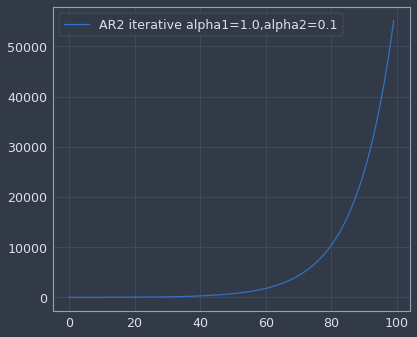

In [97]:
# Two alpha parameters
alpha1=1.0
alpha2=0.1
# generate AR2 process
xarr=get_AR2(WN_arr,alpha1,alpha2)
plt.plot(xarr,label=f'AR2 iterative alpha1={alpha1},alpha2={alpha2}')
plt.legend();
# get eigenvalues
lambda1,lambda2=get_eig(alpha1,alpha2)
print(f'lambda1={lambda1},lambda2={lambda2}')
print(f'AR2 process is stationary:{stationary(alpha1,alpha2)}')
T1=get_period(alpha1,alpha2)
print(f'T1 period ={T1}')

# Homework

Generate a sample of AR(2) processes and estimate the autocovariance function, respectively, plot the average and standard deviation.

(i) Generate a sample of processes X(t) and derive estimate the covariancefunction $\gamma(\tau)$ for each realization.

(ii) Plot the average over all realizations of $\gamma(\tau)$ and the sample uncertainty (i.e.as +−one standard deviation) as a function of $\tau$.  Plot also the theoretical autocovariance function (see Eq.  2.2.69)

In [135]:
def autocov(tmin,tmax,xarr):
    N=len(xarr) # length of input array
    xmean=np.mean(xarr)
#     assert abs(tmin)<N | abs(tmax)<N
    
    tauarr=np.arange(tmin,tmax+1)
    autoarr=np.zeros(len(tauarr))
    for i in range(len(tauarr)):
#     autoarr[i]=autocov(tauarr[i],resid)
        xsum=0
        tau=tauarr[i]
        for t in range(N-abs(tau)):
            xsum=xsum+(xarr[t] - xmean)*(xarr[t+tau]-xmean)

        curval=xsum/N
        autoarr[i]=curval
    
    return autoarr,tauarr

In [168]:

def sample_analysis(nsamlpes):
    sample_list=[]
    acf_list=[]
    
    for i in range(nsamlpes):
        # GENERATE WHITE NOISE 
        WN_arr = np.random.normal(loc=mu,scale=sigma,size=nt)
        # generate AR2 process
        xarr=get_AR2(WN_arr,alpha1,alpha2)
        sample_list.append(xarr)
        # get autocovariance
        autoarr,tauarr=autocov(1,nt,xarr)
        acf_list.append(autoarr)
        
    acf_stacked=np.vstack(acf_list)
    # std over all realizations of ACF
    acf_std_list=[]
    for t in range(nt):
        acf_std=np.std(acf_stacked[:,t])
        acf_std_list.append(acf_std)
        
    # average over all realizations of ACF
    acf_means=np.mean(acf_stacked,axis=0)
    
    return sample_list,np.array(acf_std_list),acf_means


In [206]:
def get_theoracf(sigma,alpha1,alpha2,nt):
    # get eigenvalues
    lambda1,lambda2=get_eig(alpha1,alpha2)
    
    ntaus=nt
    acfvals=[]
    for tau in range(ntaus):
        fhalf=sigma**2/((lambda1-lambda2)*(1-lambda1*lambda2))
        shalf=((lambda1**(tau+1)/(1-lambda1**2))-(lambda2**(tau+1)/(1-lambda2**2)))
        acf=fhalf*shalf
        acfvals.append(np.real(acf))
        
    return acfvals

In [207]:
# WHITE NOISE PARAMS
mu=0
sigma=5
nt=50 #  n of samples

# Two alpha parameters
alpha1=1
alpha2=-0.5
# nX = n of AR2 processes to generate
nX=200
samples,acf_stds,acf_means=sample_analysis(nX)
theoracf= get_theoracf(sigma,alpha1,alpha2,nt)

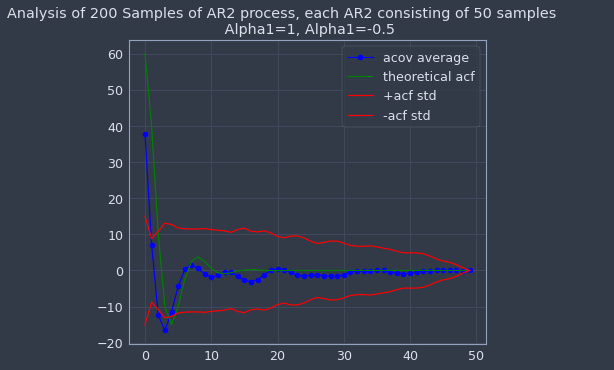

In [209]:
plt.title(f'Analysis of {nX} Samples of AR2 process, each AR2 consisting of {nt} samples \
          \n Alpha1={alpha1}, Alpha1={alpha2}')
plt.plot(acf_means,'-o',color='blue',label="acov average")
plt.plot(theoracf,color='green',label='theoretical acf')
plt.plot(acf_stds,'-',color='red',label="+acf std")
plt.plot(acf_stds*-1,'-',color='red',label="-acf std")
plt.legend()

In [210]:
# WHITE NOISE PARAMS
mu=0
sigma=5
nt=50 #  n of samples

# Two alpha parameters
alpha1=-1
alpha2=-0.5
# nX = n of AR2 processes to generate
nX=200
samples,acf_stds,acf_means=sample_analysis(nX)
theoracf= get_theoracf(sigma,alpha1,alpha2,nt)

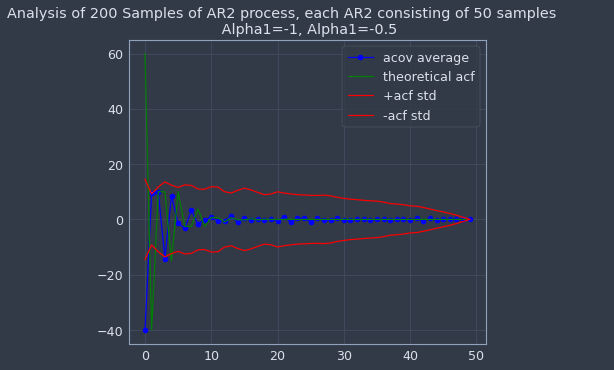

In [211]:
plt.title(f'Analysis of {nX} Samples of AR2 process, each AR2 consisting of {nt} samples \
          \n Alpha1={alpha1}, Alpha1={alpha2}')
plt.plot(acf_means,'-o',color='blue',label="acov average")
plt.plot(theoracf,color='green',label='theoretical acf')
plt.plot(acf_stds,'-',color='red',label="+acf std")
plt.plot(acf_stds*-1,'-',color='red',label="-acf std")
plt.legend()